In [0]:
import pandas as pd
import numpy as np

In [124]:
path=r'rankingcard.csv'
data=pd.read_csv(path,index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [125]:
#去除重复值
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      145563 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [126]:
data.shape[0]

149391

In [127]:
#删除之后千万不要忘记，恢复索引
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      145563 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


In [128]:
data.index

RangeIndex(start=0, stop=149391, step=1)

# 填补缺失值

In [129]:
data.isnull().sum()/data.shape[0]

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [130]:
data.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

## 使用均值填补“家属人数”

In [0]:
data["NumberOfDependents"].fillna(int(data["NumberOfDependents"].mean()),inplace=True)

## 随机森林填补收入

In [0]:
def fill_missing_rf(X,y,to_fill):
    """
    使用随机森林填补一个特征的缺失值的函数
    参数：
    X：要填补的特征矩阵
    y：完整的，没有缺失值的标签
    to_fill：字符串，要填补的那一列的名称
    """
    #构建我们的新特征矩阵和新标签
    df = X.copy()
    fill = df.loc[:,to_fill]
    df = pd.concat([df.loc[:,df.columns != to_fill],pd.DataFrame(y)],axis=1)
    #找出我们的训练集和测试集
    Ytrain = fill[fill.notnull()]
    Ytest = fill[fill.isnull()]
    Xtrain = df.iloc[Ytrain.index,:]
    Xtest = df.iloc[Ytest.index,:]
    #用随机森林回归来填补缺失值
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=100)
    rfr = rfr.fit(Xtrain, Ytrain)
    Ypredict = rfr.predict(Xtest)
    return Ypredict

In [133]:
X = data.iloc[:,1:]
y = data["SeriousDlqin2yrs"]
X.shape

(149391, 10)

In [0]:
#=====【TIME WARNING：1 min】=====#
y_pred = fill_missing_rf(X,y,"MonthlyIncome")

In [0]:
#确认我们的结果合理之后，我们就可以将数据覆盖了
data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"] = y_pred

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           149391 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      149391 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


## 异常值

In [136]:
#描述性统计
data.describe([0.01,0.1,0.25,.5,.75,.9,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5424.665952,13236.156261,0.0,0.0,0.170000,1800.000000,4420.000000,7416.000000,10800.000000,23256.100000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [137]:
#异常值也被我们观察到，年龄的最小值居然有0，这不符合银行的业务需求，即便是儿童账户也要至少8岁，我们可以
#查看一下年龄为0的人有多少
(data["age"] == 0).sum()

1

In [0]:
#发现只有一个人年龄为0，可以判断这肯定是录入失误造成的，可以当成是缺失值来处理，直接删除掉这个样本
data = data[data["age"] != 0]

In [0]:
"""
另外，有三个指标看起来很奇怪：
"NumberOfTime30-59DaysPastDueNotWorse"
"NumberOfTime60-89DaysPastDueNotWorse"
"NumberOfTimes90DaysLate"
这三个指标分别是“过去两年内出现35-59天逾期但是没有发展的更坏的次数”，“过去两年内出现60-89天逾期但是没
有发展的更坏的次数”,“过去两年内出现90天逾期的次数”。这三个指标，在99%的分布的时候依然是2，最大值却是
98，看起来非常奇怪。一个人在过去两年内逾期35~59天98次，一年6个60天，两年内逾期98次这是怎么算出来的？
我们可以去咨询业务人员，请教他们这个逾期次数是如何计算的。如果这个指标是正常的，那这些两年内逾期了98次的
客户，应该都是坏客户。在我们无法询问他们情况下，我们查看一下有多少个样本存在这种异常：
"""

In [139]:
data[data.loc[:,"NumberOfTimes90DaysLate"] > 90]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1732,1,1.0,27,98,0.000000,2700.000000,0,98,0,98,0.0
2285,0,1.0,22,98,0.000000,1291.750349,0,98,0,98,0.0
3883,0,1.0,38,98,12.000000,2562.720000,0,98,0,98,0.0
4416,0,1.0,21,98,0.000000,0.000000,0,98,0,98,0.0
4704,0,1.0,21,98,0.000000,2000.000000,0,98,0,98,0.0
5072,0,1.0,33,98,0.000000,1500.000000,0,98,0,98,0.0
6279,1,1.0,51,98,0.000000,7500.000000,0,98,0,98,0.0
7031,1,1.0,29,98,0.000000,1647.000000,0,98,0,98,0.0
7116,1,1.0,25,98,21.000000,4593.690000,0,98,0,98,0.0
7686,1,1.0,21,98,0.000000,2107.137522,0,98,0,98,0.0


In [140]:
data.loc[:,"NumberOfTimes90DaysLate"].value_counts()

0     141107
1       5232
2       1555
3        667
4        291
98       220
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [141]:
data[data.loc[:,"NumberOfTimes90DaysLate"] > 90].count()
#有225个样本存在这样的情况，并且这些样本，我们观察一下，标签并不都是1，他们并不都是坏客户。因此，我们基
#本可以判断，这些样本是某种异常，应该把它们删除

SeriousDlqin2yrs                        225
RevolvingUtilizationOfUnsecuredLines    225
age                                     225
NumberOfTime30-59DaysPastDueNotWorse    225
DebtRatio                               225
MonthlyIncome                           225
NumberOfOpenCreditLinesAndLoans         225
NumberOfTimes90DaysLate                 225
NumberRealEstateLoansOrLines            225
NumberOfTime60-89DaysPastDueNotWorse    225
NumberOfDependents                      225
dtype: int64

In [142]:
data = data[data.loc[:,"NumberOfTimes90DaysLate"] < 90]
#恢复索引
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 11 columns):
SeriousDlqin2yrs                        149165 non-null int64
RevolvingUtilizationOfUnsecuredLines    149165 non-null float64
age                                     149165 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149165 non-null int64
DebtRatio                               149165 non-null float64
MonthlyIncome                           149165 non-null float64
NumberOfOpenCreditLinesAndLoans         149165 non-null int64
NumberOfTimes90DaysLate                 149165 non-null int64
NumberRealEstateLoansOrLines            149165 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149165 non-null int64
NumberOfDependents                      149165 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


# 样本不均衡问题

In [143]:
#探索标签的分布
X = data.iloc[:,1:]
y = data.iloc[:,0]
y.value_counts()

0    139292
1      9873
Name: SeriousDlqin2yrs, dtype: int64

In [144]:
n_sample = X.shape[0]
n_1_sample = y.value_counts()[1]
n_0_sample = y.value_counts()[0]
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample,n_1_sample/n_sample,n_0_sample/n_sample))

样本个数：149165; 1占6.62%; 0占93.38%


In [0]:
import imblearn
#imblearn是专门用来处理不平衡数据集的库，在处理样本不均衡问题中性能高过sklearn很多
#imblearn里面也是一个个的类，也需要进行实例化，fit拟合，和sklearn用法相似
from imblearn.over_sampling import SMOTE

In [146]:
sm = SMOTE(random_state=42) #实例化
X,y = sm.fit_sample(X,y)
# 返回上采样后的特征矩阵和标签
n_sample_ = X.shape[0]
pd.Series(y).value_counts()

1    139292
0    139292
dtype: int64

In [147]:
n_1_sample = pd.Series(y).value_counts()[1]
n_0_sample = pd.Series(y).value_counts()[0]
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample_,n_1_sample/n_sample_,n_0_sample/n_sample_))

样本个数：278584; 1占50.00%; 0占50.00%


# 分训练集和测试集

In [0]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(X)
y = pd.DataFrame(y)

X_train, X_vali, Y_train, Y_vali = train_test_split(X,y,test_size=0.3,random_state=420)

model_data = pd.concat([Y_train, X_train], axis=1)
model_data.index = range(model_data.shape[0])

model_data.columns = data.columns
vali_data = pd.concat([Y_vali, X_vali], axis=1)
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns

In [0]:
model_data.to_csv(r"model_data.csv")
vali_data.to_csv(r"vali_data.csv")

# 分箱

## 1 等频分箱

In [0]:
#按照等频对需要分箱的列进行分箱
model_data["qcut"], updown = pd.qcut(model_data["age"], retbins=True, q=20)

In [0]:

"""
pd.qcut，基于分位数的分箱函数，本质是将连续型变量离散化
只能够处理一维数据。返回箱子的上限和下限
参数q：要分箱的个数
参数retbins=True来要求同时返回结构为索引为样本索引，元素为分到的箱子的Series
现在返回两个值：每个样本属于哪个箱子，以及所有箱子的上限和下限
"""

In [151]:
#在这里让model_data新添加一列叫做“qcut分箱”，这一列其实就是每个样本所对应的箱子
model_data["qcut"]

0             (52.0, 54.0]
1             (61.0, 64.0]
2             (39.0, 41.0]
3             (68.0, 74.0]
4             (52.0, 54.0]
5             (41.0, 43.0]
6            (36.68, 39.0]
7           (20.999, 28.0]
8           (28.0, 31.047]
9           (31.047, 34.0]
10            (61.0, 64.0]
11          (31.047, 34.0]
12            (50.0, 52.0]
13           (74.0, 107.0]
14          (31.047, 34.0]
15            (54.0, 56.0]
16           (36.68, 39.0]
17            (61.0, 64.0]
18            (52.0, 54.0]
19            (39.0, 41.0]
20          (20.999, 28.0]
21            (52.0, 54.0]
22           (74.0, 107.0]
23          (45.0, 46.975]
24            (50.0, 52.0]
25            (61.0, 64.0]
26            (61.0, 64.0]
27           (34.0, 36.68]
28            (61.0, 64.0]
29          (28.0, 31.047]
                ...       
194978        (41.0, 43.0]
194979        (61.0, 64.0]
194980      (45.0, 46.975]
194981        (43.0, 45.0]
194982       (34.0, 36.68]
194983        (50.0, 52.0]
1

In [152]:
model_data["qcut"].value_counts()

(36.68, 39.0]       10981
(50.0, 52.0]        10752
(61.0, 64.0]        10726
(31.047, 34.0]      10673
(58.662, 61.0]      10588
(20.999, 28.0]      10218
(43.0, 45.0]        10087
(52.0, 54.0]        10043
(41.0, 43.0]         9820
(48.484, 50.0]       9792
(46.975, 48.484]     9750
(39.0, 41.0]         9550
(74.0, 107.0]        9295
(28.0, 31.047]       9283
(64.0, 68.0]         9268
(54.0, 56.0]         9131
(56.0, 58.662]       9034
(68.0, 74.0]         8875
(34.0, 36.68]        8828
(45.0, 46.975]       8314
Name: qcut, dtype: int64

In [153]:
#所有箱子的上限和下限
updown

array([ 21.        ,  28.        ,  31.04665844,  34.        ,
        36.67957525,  39.        ,  41.        ,  43.        ,
        45.        ,  46.97539708,  48.48418747,  50.        ,
        52.        ,  54.        ,  56.        ,  58.66193043,
        61.        ,  64.        ,  68.        ,  74.        ,
       107.        ])

In [154]:
model_data[model_data["SeriousDlqin2yrs"] == 0].groupby(by="qcut").count()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
qcut,,,,,,,,,,,
"(20.999, 28.0]",4243,4243,4243,4243,4243,4243,4243,4243,4243,4243,4243
"(28.0, 31.047]",3571,3571,3571,3571,3571,3571,3571,3571,3571,3571,3571
"(31.047, 34.0]",4075,4075,4075,4075,4075,4075,4075,4075,4075,4075,4075
"(34.0, 36.68]",2908,2908,2908,2908,2908,2908,2908,2908,2908,2908,2908
"(36.68, 39.0]",5182,5182,5182,5182,5182,5182,5182,5182,5182,5182,5182
"(39.0, 41.0]",3956,3956,3956,3956,3956,3956,3956,3956,3956,3956,3956
"(41.0, 43.0]",4002,4002,4002,4002,4002,4002,4002,4002,4002,4002,4002
"(43.0, 45.0]",4389,4389,4389,4389,4389,4389,4389,4389,4389,4389,4389
"(45.0, 46.975]",2419,2419,2419,2419,2419,2419,2419,2419,2419,2419,2419


In [155]:
model_data[model_data["SeriousDlqin2yrs"] == 0].groupby(by="qcut").count()["SeriousDlqin2yrs"]

qcut
(20.999, 28.0]      4243
(28.0, 31.047]      3571
(31.047, 34.0]      4075
(34.0, 36.68]       2908
(36.68, 39.0]       5182
(39.0, 41.0]        3956
(41.0, 43.0]        4002
(43.0, 45.0]        4389
(45.0, 46.975]      2419
(46.975, 48.484]    4813
(48.484, 50.0]      4900
(50.0, 52.0]        4728
(52.0, 54.0]        4681
(54.0, 56.0]        4677
(56.0, 58.662]      4483
(58.662, 61.0]      6583
(61.0, 64.0]        6968
(64.0, 68.0]        6623
(68.0, 74.0]        6753
(74.0, 107.0]       7737
Name: SeriousDlqin2yrs, dtype: int64

In [0]:
# 统计每个分箱中0和1的数量
# 这里使用了数据透视表的功能groupby
coount_y0 = model_data[model_data["SeriousDlqin2yrs"] == 0].groupby(by="qcut").count()["SeriousDlqin2yrs"]
coount_y1 = model_data[model_data["SeriousDlqin2yrs"] == 1].groupby(by="qcut").count()["SeriousDlqin2yrs"]

In [71]:
[*zip([1,2,3],['a','b','c','d'])]

[(1, 'a'), (2, 'b'), (3, 'c')]

In [157]:
updown.shape

(21,)

In [158]:
#num_bins值分别为每个区间的上界，下界，0出现的次数，1出现的次数
num_bins = [*zip(updown,updown[1:],coount_y0,coount_y1)]
#注意zip会按照最短列来进行结合
num_bins

[(21.0, 28.0, 4243, 5975),
 (28.0, 31.046658442223148, 3571, 5712),
 (31.046658442223148, 34.0, 4075, 6598),
 (34.0, 36.67957524577571, 2908, 5920),
 (36.67957524577571, 39.0, 5182, 5799),
 (39.0, 41.0, 3956, 5594),
 (41.0, 43.0, 4002, 5818),
 (43.0, 45.0, 4389, 5698),
 (45.0, 46.9753970791641, 2419, 5895),
 (46.9753970791641, 48.484187473177656, 4813, 4937),
 (48.484187473177656, 50.0, 4900, 4892),
 (50.0, 52.0, 4728, 6024),
 (52.0, 54.0, 4681, 5362),
 (54.0, 56.0, 4677, 4454),
 (56.0, 58.66193042795457, 4483, 4551),
 (58.66193042795457, 61.0, 6583, 4005),
 (61.0, 64.0, 6968, 3758),
 (64.0, 68.0, 6623, 2645),
 (68.0, 74.0, 6753, 2122),
 (74.0, 107.0, 7737, 1558)]

## 2【选学】 确保每个箱中都有0和1

## 3定义WOE和IV函数

In [159]:
columns = ["min","max","count_0","count_1"]
df = pd.DataFrame(num_bins,columns=columns)
df.head()

,min,max,count_0,count_1
0,21.000000,28.000000,4243,5975
1,28.000000,31.046658,3571,5712
2,31.046658,34.000000,4075,6598
3,34.000000,36.679575,2908,5920
4,36.679575,39.000000,5182,5799


In [160]:
df["total"] = df.count_0 + df.count_1
df["percentage"] = df.total / df.total.sum()
df["bad_rate"] = df.count_1 / df.total
df["good%"] = df.count_0/df.count_0.sum()
df["bad%"] = df.count_1/df.count_1.sum()
df["woe"] = np.log(df["good%"] / df["bad%"])
df.head()

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.000000,28.000000,4243,5975,10218,0.052398,0.584752,0.043433,0.061397,-0.346149
1,28.000000,31.046658,3571,5712,9283,0.047603,0.615318,0.036554,0.058695,-0.473559
2,31.046658,34.000000,4075,6598,10673,0.054731,0.618195,0.041713,0.067799,-0.485732
3,34.000000,36.679575,2908,5920,8828,0.045270,0.670594,0.029767,0.060832,-0.714707
4,36.679575,39.000000,5182,5799,10981,0.056311,0.528094,0.053045,0.059589,-0.116330


In [161]:
rate = df["good%"] - df["bad%"]
iv = np.sum(rate * df.woe)
iv

0.3312838502339025

In [0]:
#计算WOE和BAD RATE
#BAD RATE与bad%不是一个东西
#BAD RATE是一个箱中，坏的样本所占的比例 (bad/total)
#而bad%是一个箱中的坏样本占整个特征中的坏样本的比例
def get_woe(num_bins):
    # 通过 num_bins 数据计算 woe
    columns = ["min","max","count_0","count_1"]
    df = pd.DataFrame(num_bins,columns=columns)
    df["total"] = df.count_0 + df.count_1
    df["percentage"] = df.total / df.total.sum()
    df["bad_rate"] = df.count_1 / df.total
    df["good%"] = df.count_0/df.count_0.sum()
    df["bad%"] = df.count_1/df.count_1.sum()
    df["woe"] = np.log(df["good%"] / df["bad%"])
    return df
#计算IV值
def get_iv(df):
    rate = df["good%"] - df["bad%"]
    iv = np.sum(rate * df.woe)
    return iv

## 4 卡方检验，合并箱体，画出IV曲线

In [0]:
num_bins_ = num_bins.copy()
import matplotlib.pyplot as plt
import scipy

In [164]:
num_bins_

[(21.0, 28.0, 4243, 5975),
 (28.0, 31.046658442223148, 3571, 5712),
 (31.046658442223148, 34.0, 4075, 6598),
 (34.0, 36.67957524577571, 2908, 5920),
 (36.67957524577571, 39.0, 5182, 5799),
 (39.0, 41.0, 3956, 5594),
 (41.0, 43.0, 4002, 5818),
 (43.0, 45.0, 4389, 5698),
 (45.0, 46.9753970791641, 2419, 5895),
 (46.9753970791641, 48.484187473177656, 4813, 4937),
 (48.484187473177656, 50.0, 4900, 4892),
 (50.0, 52.0, 4728, 6024),
 (52.0, 54.0, 4681, 5362),
 (54.0, 56.0, 4677, 4454),
 (56.0, 58.66193042795457, 4483, 4551),
 (58.66193042795457, 61.0, 6583, 4005),
 (61.0, 64.0, 6968, 3758),
 (64.0, 68.0, 6623, 2645),
 (68.0, 74.0, 6753, 2122),
 (74.0, 107.0, 7737, 1558)]

In [0]:
pvs = []
# 获取 num_bins_两两之间的卡方检验的置信度（或卡方值）
for i in range(len(num_bins_)-1):
    x1 = num_bins_[i][2:]
    x2 = num_bins_[i+1][2:]

    # 0 返回 chi2 值，1 返回 p 值。
    pv = scipy.stats.chi2_contingency([x1,x2])[1]
    # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]
    pvs.append(pv)

In [82]:
pvs

[1.4541144216637752e-05,
 0.6873868146616421,
 3.408314218772921e-14,
 2.5720153104769723e-91,
 1.2459265971418666e-16,
 0.3504558600526714,
 8.662107210366625e-05,
 3.1363312880202392e-90,
 7.819830227985608e-169,
 0.3514655435877374,
 3.609208437057258e-18,
 0.00014301230590775394,
 1.943594963687778e-10,
 0.032497229772238956,
 9.136097086924781e-70,
 2.4742336879122855e-05,
 1.08182814425799e-22,
 1.6054251295172654e-12,
 5.348034041653975e-33]

In [84]:
i = pvs.index(max(pvs))
i

1

In [85]:
num_bins_[i:i+2]

[(28.0, 31.046658442223148, 3571, 5712),
 (31.046658442223148, 34.0, 4075, 6598)]

In [0]:
num_bins_[i:i+2] = [(
                    num_bins_[i][0],
                    num_bins_[i+1][1],
                    num_bins_[i][2]+num_bins_[i+1][2],
                    num_bins_[i][3]+num_bins_[i+1][3])]

In [88]:
num_bins_

[(21.0, 28.0, 4243, 5975),
 (28.0, 34.0, 7646, 12310),
 (34.0, 36.67957524577571, 2908, 5920),
 (36.67957524577571, 39.0, 5182, 5799),
 (39.0, 41.0, 3956, 5594),
 (41.0, 43.0, 4002, 5818),
 (43.0, 45.0, 4389, 5698),
 (45.0, 46.9753970791641, 2419, 5895),
 (46.9753970791641, 48.484187473177656, 4813, 4937),
 (48.484187473177656, 50.0, 4900, 4892),
 (50.0, 52.0, 4728, 6024),
 (52.0, 54.0, 4681, 5362),
 (54.0, 56.0, 4677, 4454),
 (56.0, 58.66193042795457, 4483, 4551),
 (58.66193042795457, 61.0, 6583, 4005),
 (61.0, 64.0, 6968, 3758),
 (64.0, 68.0, 6623, 2645),
 (68.0, 74.0, 6753, 2122),
 (74.0, 107.0, 7737, 1558)]

In [89]:
len(num_bins_)

19

### 循环完成

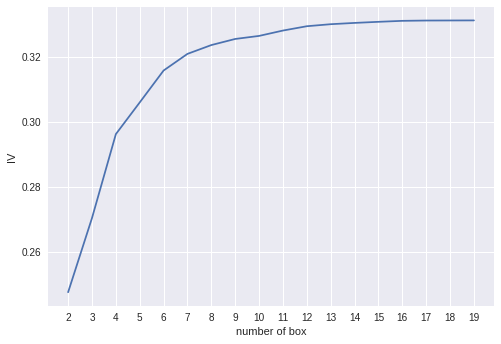

In [166]:
num_bins_ = num_bins.copy()
IV = []
axisx = []

while len(num_bins_) > 2:
    pvs = []
    # 获取 num_bins_两两之间的卡方检验的置信度（或卡方值）
    for i in range(len(num_bins_)-1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i+1][2:]
        
        # 0 返回 chi2 值，1 返回 p 值。
        pv = scipy.stats.chi2_contingency([x1,x2])[1]
        # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]
        pvs.append(pv)
    # 通过 p 值进行处理。合并 p 值最大的两组
    i = pvs.index(max(pvs))
    num_bins_[i:i+2] = [(
                        num_bins_[i][0],
                        num_bins_[i+1][1],
                        num_bins_[i][2]+num_bins_[i+1][2],
                        num_bins_[i][3]+num_bins_[i+1][3])]
    bins_df = get_woe(num_bins_)
    axisx.append(len(num_bins_))
    IV.append(get_iv(bins_df))
plt.figure()
plt.plot(axisx,IV)
plt.xticks(axisx)
plt.xlabel("number of box")
plt.ylabel("IV")
plt.show()

## 5 用最佳分箱个数分箱，并验证分箱结果

In [0]:
num_bins_ = num_bins.copy()

def get_bin(num_bins_,n):
    while len(num_bins_) > n:
        pvs = []
        for i in range(len(num_bins_)-1):
            x1 = num_bins_[i][2:]
            x2 = num_bins_[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]
            pvs.append(pv)
        i = pvs.index(max(pvs))
        num_bins_[i:i+2] = [(
                            num_bins_[i][0],
                            num_bins_[i+1][1],
                            num_bins_[i][2]+num_bins_[i+1][2],
                            num_bins_[i][3]+num_bins_[i+1][3])]
    return num_bins_

In [168]:
afterbins = get_bin(num_bins,6)
afterbins

[(21.0, 45.0, 32326, 47114),
 (45.0, 46.9753970791641, 2419, 5895),
 (46.9753970791641, 58.66193042795457, 28282, 30220),
 (58.66193042795457, 64.0, 13551, 7763),
 (64.0, 74.0, 13376, 4767),
 (74.0, 107.0, 7737, 1558)]

In [169]:
bins_df = get_woe(afterbins)
bins_df

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.000000,45.000000,32326,47114,79440,0.407368,0.593077,0.330900,0.484129,-0.380534
1,45.000000,46.975397,2419,5895,8314,0.042634,0.709045,0.024762,0.060575,-0.894586
2,46.975397,58.661930,28282,30220,58502,0.299998,0.516564,0.289505,0.310532,-0.070114
3,58.661930,64.000000,13551,7763,21314,0.109298,0.364221,0.138713,0.079770,0.553256
4,64.000000,74.000000,13376,4767,18143,0.093037,0.262746,0.136922,0.048984,1.027909
5,74.000000,107.000000,7737,1558,9295,0.047665,0.167617,0.079199,0.016010,1.598775


## 6 将选取最佳分箱个数的过程包装为函数

In [0]:
def graphforbestbin(DF, X, Y, n=5,q=20,graph=True):
    """
    自动最优分箱函数，基于卡方检验的分箱
    参数：
    DF: 需要输入的数据
    X: 需要分箱的列名
    Y: 分箱数据对应的标签 Y 列名
    n: 保留分箱个数
    q: 初始分箱的个数
    graph: 是否要画出IV图像
    区间为前开后闭 (]
    """
    DF = DF[[X,Y]].copy()
    
    DF["qcut"],bins = pd.qcut(DF[X], retbins=True, q=q,duplicates="drop")
    coount_y0 = DF.loc[DF[Y]==0].groupby(by="qcut").count()[Y]
    coount_y1 = DF.loc[DF[Y]==1].groupby(by="qcut").count()[Y]
    num_bins = [*zip(bins,bins[1:],coount_y0,coount_y1)]
    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(
                num_bins[0][0],
                num_bins[1][1],
                num_bins[0][2]+num_bins[1][2],
                num_bins[0][3]+num_bins[1][3])]
        continue
        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(
                    num_bins[i-1][0],
                    num_bins[i][1],
                    num_bins[i-1][2]+num_bins[i][2],
                    num_bins[i-1][3]+num_bins[i][3])]
                break
        else:
            break
    def get_woe(num_bins):
        columns = ["min","max","count_0","count_1"]
        df = pd.DataFrame(num_bins,columns=columns)
        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total
        df["good%"] = df.count_0/df.count_0.sum()
        df["bad%"] = df.count_1/df.count_1.sum()
        df["woe"] = np.log(df["good%"] / df["bad%"])
        return df
    def get_iv(df):
        rate = df["good%"] - df["bad%"]
        iv = np.sum(rate * df.woe)
        return iv
    IV = []
    axisx = []
    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)
        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(
                num_bins[i][0],
                num_bins[i+1][1],
                num_bins[i][2]+num_bins[i+1][2],
                num_bins[i][3]+num_bins[i+1][3])]
        
        bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))
    if graph:
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.xlabel("number of box")
        plt.ylabel("IV")
        plt.show()
    return bins_df

## 7对所有特征进行分箱选择

In [171]:
model_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'qcut'],
      dtype='object')

In [103]:
model_data['NumberOfTime30-59DaysPastDueNotWorse']

0         0.000000
1         0.000000
2         1.141971
3         0.000000
4         0.000000
5         0.000000
6         1.129686
7         0.000000
8         0.507314
9         0.000000
10        0.000000
11        0.000000
12        0.000000
13        0.000000
14        0.000000
15        0.000000
16        1.000000
17        0.000000
18        5.637304
19        5.870812
20        1.000000
21        2.890170
22        0.000000
23        0.000000
24        0.000000
25        0.000000
26        0.000000
27        0.000000
28        0.000000
29        0.000000
            ...   
194978    0.000000
194979    0.000000
194980    0.798543
194981    0.000000
194982    0.000000
194983    0.000000
194984    0.000000
194985    0.000000
194986    0.000000
194987    0.000000
194988    0.000000
194989    0.000000
194990    2.000000
194991    0.000000
194992    1.486638
194993    0.000000
194994    0.000000
194995    0.791011
194996    0.000000
194997    0.000000
194998    1.000000
194999    0.

RevolvingUtilizationOfUnsecuredLines


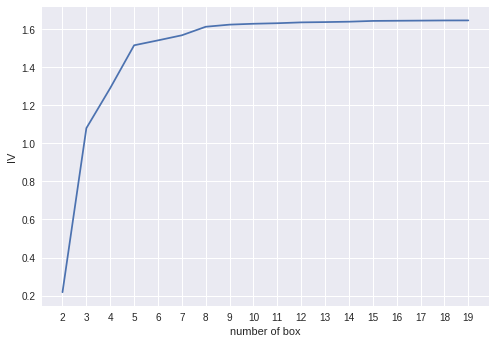

age


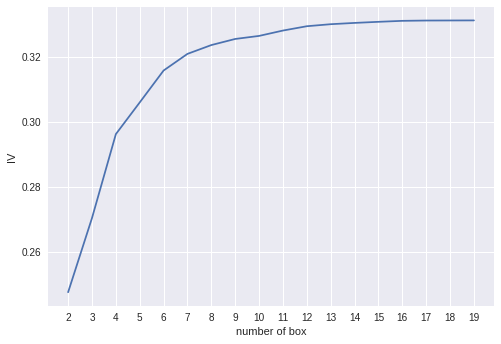

NumberOfTime30-59DaysPastDueNotWorse


ValueError: ignored

In [172]:
for i in model_data.columns[1:-1]:
    print(i)
    graphforbestbin(model_data,i,"SeriousDlqin2yrs",n=2,q=20)

In [0]:
auto_col_bins = {"RevolvingUtilizationOfUnsecuredLines":6,
                "age":5,
                "DebtRatio":4,
                "MonthlyIncome":3,
                "NumberOfOpenCreditLinesAndLoans":3}
#不能使用自动分箱的变量
hand_bins = {"NumberOfTime30-59DaysPastDueNotWorse":[0,1,2,13]
            ,"NumberOfTimes90DaysLate":[0,1,2,17]
            ,"NumberRealEstateLoansOrLines":[0,1,2,4,54]
            ,"NumberOfTime60-89DaysPastDueNotWorse":[0,1,2,8]
            ,"NumberOfDependents":[0,1,2,3]}
#保证区间覆盖使用 np.inf替换最大值，用-np.inf替换最小值
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}

In [190]:
bins_of_col = {}
# 生成自动分箱的分箱区间和分箱后的 IV 值
for col in auto_col_bins:
    bins_df = graphforbestbin(model_data,col
                                ,"SeriousDlqin2yrs"
                                ,n=auto_col_bins[col]
                                #使用字典的性质来取出每个特征所对应的箱的数量
                                ,q=20
                                ,graph=False)
    bins_list = sorted(set(bins_df["min"]).union(bins_df["max"]))
    #保证区间覆盖使用 np.inf 替换最大值 -np.inf 替换最小值
    bins_list[0],bins_list[-1] = -np.inf,np.inf
    bins_of_col[col] = bins_list

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log


In [191]:
#合并手动分箱数据
bins_of_col.update(hand_bins)
bins_of_col

{'DebtRatio': [-inf,
  0.01723790571264451,
  0.5036376475205819,
  1.4766941820578796,
  inf],
 'MonthlyIncome': [-inf, 0.1, 7709.080643861425, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf,
  8.890647307362393,
  9.081873597549807,
  inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.09909885424999999,
  0.29764654264798535,
  0.46519198100000003,
  0.982651233415105,
  0.9999998999999999,
  inf],
 'age': [-inf, 45.0, 46.9753970791641, 58.66193042795457, 64.0, inf]}

# 计算各箱的WOE并映射到数据中

In [185]:
data = model_data.copy()
#函数pd.cut，可以根据已知的分箱间隔把数据分箱
#参数为 pd.cut(数据，以列表表示的分箱间隔)
data = data[["age","SeriousDlqin2yrs"]].copy()
data["cut"] = pd.cut(data["age"],[-np.inf, 48.49986200790144, 58.757170160044694, 64.0,74.0, np.inf])
data.head()

,age,SeriousDlqin2yrs,cut
0,53.000000,0,"(48.5, 58.757]"
1,63.000000,0,"(58.757, 64.0]"
2,39.716057,1,"(-inf, 48.5]"
3,73.000000,0,"(64.0, 74.0]"
4,53.636002,1,"(48.5, 58.757]"


In [177]:
#将数据按分箱结果聚合，并取出其中的标签值
data.groupby("cut")["SeriousDlqin2yrs"].value_counts()

cut             SeriousDlqin2yrs
(-inf, 48.5]    1                   57978
                0                   39558
(48.5, 58.757]  1                   25393
                0                   23469
(58.757, 64.0]  0                   13551
                1                    7621
(64.0, 74.0]    0                   13376
                1                    4767
(74.0, inf]     0                    7737
                1                    1558
Name: SeriousDlqin2yrs, dtype: int64

In [178]:
#使用unstack()来将树状结构变成表状结构
data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()

SeriousDlqin2yrs,0,1
cut,,
"(-inf, 48.5]",39558,57978
"(48.5, 58.757]",23469,25393
"(58.757, 64.0]",13551,7621
"(64.0, 74.0]",13376,4767
"(74.0, inf]",7737,1558


In [107]:
bins_df = data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()
bins_df

SeriousDlqin2yrs,0,1
cut,,
"(-inf, 48.5]",39558,57978
"(48.5, 58.757]",23469,25393
"(58.757, 64.0]",13551,7621
"(64.0, 74.0]",13376,4767
"(74.0, inf]",7737,1558


In [108]:
bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
bins_df

SeriousDlqin2yrs,0,1,woe
cut,,,
"(-inf, 48.5]",39558,57978,-0.386131
"(48.5, 58.757]",23469,25393,-0.082629
"(58.757, 64.0]",13551,7621,0.571717
"(64.0, 74.0]",13376,4767,1.027909
"(74.0, inf]",7737,1558,1.598775


In [0]:
def get_woe2(df,col,y,bins):
    df = df[[col,y]].copy()
    df["cut"] = pd.cut(df[col],bins)
    bins_df = df.groupby("cut")[y].value_counts().unstack()
    woe = bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    return woe

In [0]:
#将所有特征的WOE存储到字典当中
woeall = {}
for col in bins_of_col:
    woeall[col] = get_woe2(model_data,col,"SeriousDlqin2yrs",bins_of_col[col])

In [193]:
woeall

{'DebtRatio': cut
 (-inf, 0.0172]     1.493300
 (0.0172, 0.504]   -0.009393
 (0.504, 1.477]    -0.472798
 (1.477, inf]       0.174472
 dtype: float64, 'MonthlyIncome': cut
 (-inf, 0.1]        1.360305
 (0.1, 7709.081]   -0.175220
 (7709.081, inf]    0.355978
 dtype: float64, 'NumberOfDependents': cut
 (-inf, 0.0]    0.631259
 (0.0, 1.0]    -0.582210
 (1.0, 2.0]    -0.531595
 (2.0, inf]    -0.479840
 dtype: float64, 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 8.891]    -0.100128
 (8.891, 9.082]    1.219887
 (9.082, inf]      0.016237
 dtype: float64, 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    1.092955
 (0.0, 1.0]    -1.380308
 (1.0, 2.0]    -2.048467
 (2.0, inf]    -2.306575
 dtype: float64, 'NumberOfTime60-89DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.540065
 (0.0, 1.0]    -2.460551
 (1.0, 2.0]    -2.925575
 (2.0, inf]    -2.880735
 dtype: float64, 'NumberOfTimes90DaysLate': cut
 (-inf, 0.0]    0.695135
 (0.0, 1.0]    -2.574850
 (1.0, 2.0]    -2.971783
 (2.0, inf]  

In [194]:
#不希望覆盖掉原本的数据，创建一个新的DataFrame，索引和原始数据model_data一模一样
model_woe = pd.DataFrame(index=model_data.index)
#将原数据分箱后，按箱的结果把WOE结构用map函数映射到数据中
model_woe["age"] = pd.cut(model_data["age"],bins_of_col["age"]).map(woeall["age"])
#对所有特征操作可以写成：
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col],bins_of_col[col]).map(woeall[col])
    
#将标签补充到数据中
model_woe["SeriousDlqin2yrs"] = model_data["SeriousDlqin2yrs"]

#这就是我们的建模数据了
model_woe.head()

,age,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,-0.070114,2.203963,-0.009393,-0.175220,-0.100128,1.092955,0.695135,0.196166,0.540065,0.631259,0
1,0.553256,0.664389,-0.009393,-0.175220,-0.100128,1.092955,0.695135,0.196166,0.540065,0.631259,0
2,-0.380534,-2.044111,-0.009393,-0.175220,-0.100128,-2.048467,-2.574850,0.010661,-2.925575,-0.479840,1
3,1.201543,2.203963,-0.472798,-0.175220,0.016237,1.092955,0.695135,-0.122637,0.540065,0.631259,0
4,-0.070114,-1.073433,-0.009393,0.355978,0.016237,1.092955,0.695135,-0.122637,0.540065,-0.582210,1


# 建模与模型验证

In [195]:
model_woe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195008 entries, 0 to 195007
Data columns (total 11 columns):
age                                     195008 non-null float64
RevolvingUtilizationOfUnsecuredLines    195008 non-null float64
DebtRatio                               195008 non-null float64
MonthlyIncome                           195008 non-null float64
NumberOfOpenCreditLinesAndLoans         195008 non-null float64
NumberOfTime30-59DaysPastDueNotWorse    195008 non-null float64
NumberOfTimes90DaysLate                 195008 non-null float64
NumberRealEstateLoansOrLines            195008 non-null float64
NumberOfTime60-89DaysPastDueNotWorse    195008 non-null float64
NumberOfDependents                      195008 non-null float64
SeriousDlqin2yrs                        195008 non-null int64
dtypes: float64(10), int64(1)
memory usage: 16.4 MB


In [0]:
#处理测试集
vali_woe = pd.DataFrame(index=vali_data.index)
for col in bins_of_col:
    vali_woe[col] = pd.cut(vali_data[col],bins_of_col[col]).map(woeall[col])
vali_woe["SeriousDlqin2yrs"] = vali_data["SeriousDlqin2yrs"]
vali_X = vali_woe.iloc[:,:-1]
vali_y = vali_woe.iloc[:,-1]
X = model_woe.iloc[:,:-1]
y = model_woe.iloc[:,-1]

In [197]:
vali_woe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83576 entries, 0 to 83575
Data columns (total 11 columns):
RevolvingUtilizationOfUnsecuredLines    83576 non-null float64
age                                     83576 non-null float64
DebtRatio                               83576 non-null float64
MonthlyIncome                           83576 non-null float64
NumberOfOpenCreditLinesAndLoans         83576 non-null float64
NumberOfTime30-59DaysPastDueNotWorse    83576 non-null float64
NumberOfTimes90DaysLate                 83576 non-null float64
NumberRealEstateLoansOrLines            83576 non-null float64
NumberOfTime60-89DaysPastDueNotWorse    83576 non-null float64
NumberOfDependents                      83576 non-null float64
SeriousDlqin2yrs                        83576 non-null int64
dtypes: float64(10), int64(1)
memory usage: 7.0 MB


In [200]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR().fit(X,y)
lr.score(vali_X,vali_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8636450655690628

In [0]:
c_1 = np.linspace(0.01,1,20)
c_2 = np.linspace(0.01,0.2,20)

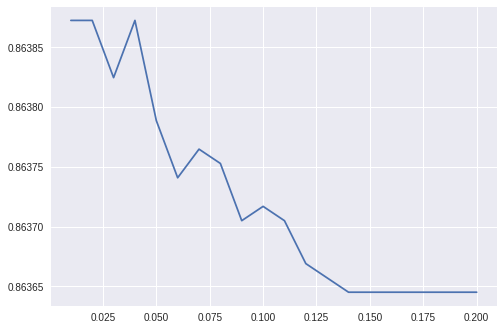

In [199]:
score = []
for i in c_2:
    lr = LR(solver='liblinear',C=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot(c_2,score)
plt.show()

In [201]:
lr.n_iter_

array([7], dtype=int32)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


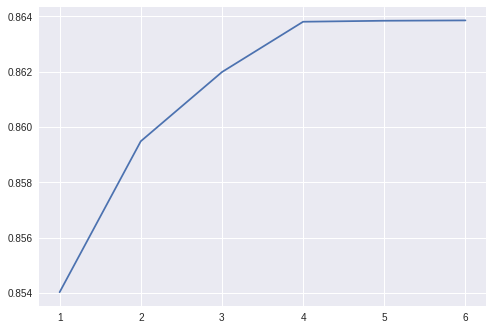

In [202]:
score = []
for i in [1,2,3,4,5,6]:
    lr = LR(solver='liblinear',C=0.025,max_iter=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot([1,2,3,4,5,6],score)
plt.show()

In [207]:
!pip install scikit-plot

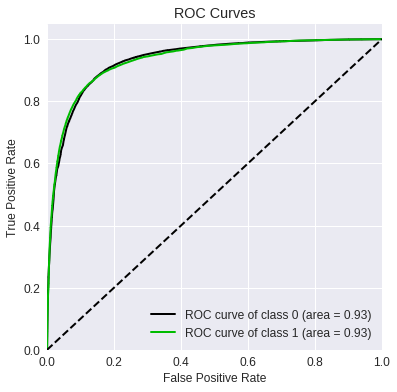

In [208]:
import scikitplot as skplt
#%%cmd
#pip install scikit-plot
vali_proba_df = pd.DataFrame(lr.predict_proba(vali_X))
skplt.metrics.plot_roc(vali_y, vali_proba_df,
                        plot_micro=False,figsize=(6,6),
                        plot_macro=False)

# 制作评分卡

In [210]:
B = 20/np.log(2)
A = 600 + B*np.log(1/60)
B,A

(28.85390081777927, 481.8621880878296)

In [211]:
base_score = A - B*lr.intercept_
base_score

array([481.36941636])

In [214]:
lr.coef_[0]

array([-0.33930438, -0.62862   , -0.0598851 , -0.83140322, -0.80333666,
       -0.63683291, -0.69510619, -1.96878632, -0.56497919, -0.59352962])

In [218]:
score_age = woeall["age"] * (-B*lr.coef_[0][0])
score_age

age
(-inf, 45.0]        -3.725526
(45.0, 46.975]      -8.758225
(46.975, 58.662]    -0.686435
(58.662, 64.0]       5.416515
(64.0, inf]         11.763414
dtype: float64

In [0]:
file = "ScoreData2.csv"
#open是用来打开文件的python命令，第一个参数是文件的路径+文件名，如果你的文件是放在根目录下，则你只需要文件名就好
#第二个参数是打开文件后的用途，"w"表示用于写入，通常使用的是"r"，表示打开来阅读
#首先写入基准分数
#之后使用循环，每次生成一组score_age类似的分档和分数，不断写入文件之中
with open(file,"w") as fdata:
    fdata.write("base_score,{}\n".format(base_score))
for i,col in enumerate(X.columns):
    score = woeall[col] * (-B*lr.coef_[0][i])
    score.name = "Score"
    score.index.name = col
    score.to_csv(file,header=True,mode="a")

In [217]:
X.columns

Index(['age', 'RevolvingUtilizationOfUnsecuredLines', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [219]:
[*enumerate(X.columns)]

[(0, 'age'),
 (1, 'RevolvingUtilizationOfUnsecuredLines'),
 (2, 'DebtRatio'),
 (3, 'MonthlyIncome'),
 (4, 'NumberOfOpenCreditLinesAndLoans'),
 (5, 'NumberOfTime30-59DaysPastDueNotWorse'),
 (6, 'NumberOfTimes90DaysLate'),
 (7, 'NumberRealEstateLoansOrLines'),
 (8, 'NumberOfTime60-89DaysPastDueNotWorse'),
 (9, 'NumberOfDependents')]